In [9]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Exploring optimisation of analytic functions

In [42]:
def rastrigin(X, A=1.0):
    return A*2 + ( (X[0]**2 - A*torch.cos(2*math.pi*X[0])) + (X[1]**2 - A*torch.cos(2*math.pi*X[1])) ) 

In [132]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
xs = np.arange(xmin, (xmax + xstep), xstep)
ys = np.arange(ymin, (ymax + ystep), ystep)
z = rastrigin(torch.tensor([xs,ys]), A=1.0).numpy()

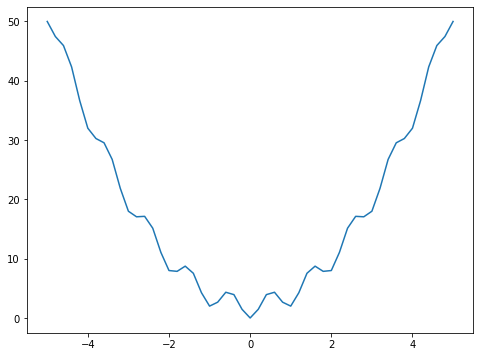

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xs, z)

Parameters initialised:
   tensor([5., 5.], requires_grad=True) torch.FloatTensor
Max epochs:
   100
Initialised SGD:
  Learning rate:0.01
Initialised SGD Momentum:
  Learning rate:0.01, Momentum:0.09
Initialised Adagrad:
  Learning rate:0.01
Initialised Adam:
  Learning rate:0.01
Loss function:
  Rastrigin, A=1.0


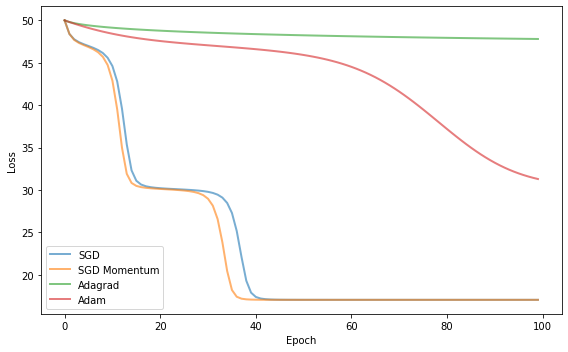

In [127]:
p_SGD = torch.tensor([5.0, 5.0], requires_grad=True, device=device)
p_SGD_Mom = torch.tensor([5.0, 5.0], requires_grad=True, device=device)
p_Adagrad = torch.tensor([5.0, 5.0], requires_grad=True, device=device)
p_Adam = torch.tensor([5.0, 5.0], requires_grad=True, device=device)
print('Parameters initialised:\n  ', p_SGD, p_SGD.type())
epochs = 100
print('Max epochs:\n  ', epochs)
A = 1.0
opt_SGD = torch.optim.SGD([p_SGD], lr=0.01)
print(f'Initialised SGD:\n  Learning rate:{0.01}')
opt_SGD_Mom = torch.optim.SGD([p_SGD_Mom], lr=0.01, momentum=0.09)
print(f'Initialised SGD Momentum:\n  Learning rate:{0.01}, Momentum:{0.09}')
opt_Adagrad = torch.optim.Adagrad([p_Adagrad], lr=0.01)
print(f'Initialised Adagrad:\n  Learning rate:{0.01}')
opt_Adam = torch.optim.Adam([p_Adam], lr=0.01)
print(f'Initialised Adam:\n  Learning rate:{0.01}')

plt_loss_SGD = []
plt_loss_SGD_Mom = []
plt_loss_Adagrad = []
plt_loss_Adam = []

for epoch in range(epochs):
    # zero gradients
    opt_SGD.zero_grad()
    opt_SGD_Mom.zero_grad()
    opt_Adagrad.zero_grad()
    opt_Adam.zero_grad()
    # compute loss
    loss_SGD = rastrigin(p_SGD, A=A)
    loss_SGD_Mom = rastrigin(p_SGD_Mom, A=A)
    loss_Adagrad = rastrigin(p_Adagrad, A=A)
    loss_Adam = rastrigin(p_Adam, A=A)
    # backprop
    loss_SGD.backward()
    loss_SGD_Mom.backward()
    loss_Adagrad.backward()
    loss_Adam.backward()
    # step optimiser
    opt_SGD.step()
    opt_SGD_Mom.step()
    opt_Adagrad.step()
    opt_Adam.step()
    # store loss for plots
    plt_loss_SGD.append(loss_SGD.item())
    plt_loss_SGD_Mom.append(loss_SGD_Mom.item())
    plt_loss_Adagrad.append(loss_Adagrad.item())
    plt_loss_Adam.append(loss_Adam.item())


print(f'Loss function:\n  Rastrigin, A={A}')
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(plt_loss_SGD, label='SGD', linewidth=2, alpha=.6)
ax.plot(plt_loss_SGD_Mom, label='SGD Momentum', linewidth=2, alpha=.6)
ax.plot(plt_loss_Adagrad, label='Adagrad', linewidth=2, alpha=.6)
ax.plot(plt_loss_Adam, label='Adam', linewidth=2, alpha=.6)

ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.tight_layout()
plt.savefig('optimiser_comparison_rastrigin.png')

In [128]:
plt_loss_SGD[-1]

17.053133010864258

In [129]:
plt_loss_SGD_Mom[-1]

17.053133010864258

In [130]:
plt_loss_Adagrad[-1]

47.806068420410156

In [131]:
plt_loss_Adam[-1]

31.296653747558594